In [4]:
import pandas as pd

# Load the uploaded dataset
file_path = 'simplified_datataGold612.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


C:\Users\cheth\AppData\Local\Temp\ipykernel_26428\3917412254.py:5: DtypeWarning: Columns (10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,country,Age,gender,year,Glasses_status_Pres_DVA,right_distance_acuity_pinhole,left_distance_acuity_pinhole,region,World,Gender,lens_status_right,lens_status_left,poor_vision_cause_right,poor_vision_cause_left,poor_vision_cause_principle,surgery_type_right,surgery_type_left,Study_ID,level,iso3
0,India,41.0,female,2002,False,0.0,0.0,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND
1,India,65.0,male,2002,False,0.0,4.0,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND
2,India,56.0,female,2002,False,0.096910013,0.096910013,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND
3,India,52.0,male,2002,False,1.0,0.698970004,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND
4,India,42.0,male,2002,False,0.0,0.0,South Asia,world,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Subnational,IND


In [6]:
# Check for missing values and data types in the dataset
missing_summary = data.isnull().sum()

# Display the missing value summary and unique data types to assess preprocessing needs
missing_summary, data.dtypes.unique()


(country                              0
 Age                                812
 gender                              17
 year                                 0
 Glasses_status_Pres_DVA          10409
 right_distance_acuity_pinhole     8047
 left_distance_acuity_pinhole      8055
 region                           16399
 World                            16399
 Gender                           16399
 lens_status_right                54519
 lens_status_left                 54519
 poor_vision_cause_right          54519
 poor_vision_cause_left           54519
 poor_vision_cause_principle      54519
 surgery_type_right               68957
 surgery_type_left                69135
 Study_ID                         53832
 level                                0
 iso3                                 0
 dtype: int64,
 array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object))

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Make a copy of the dataset for preprocessing
data_cleaned = data.copy()

# 1. Handle missing values for numerical columns
num_imputer = SimpleImputer(strategy="median")
numeric_columns = data_cleaned.select_dtypes(include=["float64", "int64"]).columns
data_cleaned[numeric_columns] = num_imputer.fit_transform(data_cleaned[numeric_columns])

# 2. Handle missing values for categorical columns
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
categorical_columns = data_cleaned.select_dtypes(include=["object"]).columns
data_cleaned[categorical_columns] = cat_imputer.fit_transform(data_cleaned[categorical_columns])

# 3. Normalize numerical features
scaler = StandardScaler()
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

# 4. Encode categorical features
# Convert all categorical columns to string type to ensure uniform encoding
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].astype(str)

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Check the cleaned dataset after fixing the issue
data_cleaned.head()


,country,Age,gender,year,Glasses_status_Pres_DVA,right_distance_acuity_pinhole,left_distance_acuity_pinhole,region,World,Gender,lens_status_right,lens_status_left,poor_vision_cause_right,poor_vision_cause_left,poor_vision_cause_principle,surgery_type_right,surgery_type_left,Study_ID,level,iso3
0,3,-1.084880,0,-1.203816,0,15,17,4,1,0,6,6,14,15,14,3,3,16398,0,3
1,3,0.707083,1,-1.203816,0,15,134,4,1,0,6,6,14,15,14,3,3,16398,0,3
2,3,0.035097,0,-1.203816,0,22,23,4,1,0,6,6,14,15,14,3,3,16398,0,3
3,3,-0.263564,1,-1.203816,0,83,64,4,1,0,6,6,14,15,14,3,3,16398,0,3
4,3,-1.010215,1,-1.203816,0,15,17,4,1,0,6,6,14,15,14,3,3,16398,0,3


In [10]:
from sklearn.model_selection import train_test_split

# Assuming "right_distance_acuity_pinhole" is the target variable for vision acuity prediction
# Separate features and target
X = data_cleaned.drop(columns=["right_distance_acuity_pinhole"])
y = data_cleaned["right_distance_acuity_pinhole"]

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting splits to confirm
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((56184, 19), (14046, 19), (56184,), (14046,))

In [12]:
# Training set: 56,184 samples
# Test set: 14,046 samples


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(272.5166515601666, 0.8384908290836576)

In [20]:
from sklearn.linear_model import Ridge

# Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0, random_state=42)

# Train the model on the training set
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_ridge, r2_ridge


(881.3297443630904, 0.4776728853041551)

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)

# Train the model on the training set
decision_tree_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_dt, r2_dt


(267.13309043350233, 0.8416814395992613)

In [24]:
# Importing necessary libraries after reset
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Reload the dataset
file_path = 'simplified_datataGold612.csv'
data = pd.read_csv(file_path)

# Preprocessing: Handle missing values, normalize numerical data, and encode categorical data
data_cleaned = data.copy()

# Handle missing values for numerical columns
num_imputer = SimpleImputer(strategy="median")
numeric_columns = data_cleaned.select_dtypes(include=["float64", "int64"]).columns
data_cleaned[numeric_columns] = num_imputer.fit_transform(data_cleaned[numeric_columns])

# Handle missing values for categorical columns
cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
categorical_columns = data_cleaned.select_dtypes(include=["object"]).columns
data_cleaned[categorical_columns] = cat_imputer.fit_transform(data_cleaned[categorical_columns])

# Normalize numerical features
scaler = StandardScaler()
data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

# Encode categorical features
data_cleaned[categorical_columns] = data_cleaned[categorical_columns].astype(str)
for column in categorical_columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])

# Define features and target variable
X = data_cleaned.drop(columns=["right_distance_acuity_pinhole"])
y = data_cleaned["right_distance_acuity_pinhole"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually tuning the Random Forest model with reasonable parameters
model_tuned = RandomForestRegressor(
    n_estimators=100, max_depth=20, min_samples_leaf=2, random_state=42
)

# Train the model with the tuned parameters
model_tuned.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = model_tuned.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Get feature importances
feature_importances = model_tuned.feature_importances_
important_features = pd.DataFrame(
    {"Feature": X.columns, "Importance": feature_importances}
).sort_values(by="Importance", ascending=False)

# Output results
mse_tuned, r2_tuned, important_features.head()


C:\Users\cheth\AppData\Local\Temp\ipykernel_26428\2880379938.py:11: DtypeWarning: Columns (10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


(252.77370592791928,
 0.850191643555931,
                          Feature  Importance
 4        Glasses_status_Pres_DVA    0.404004
 5   left_distance_acuity_pinhole    0.240265
 6                         region    0.153090
 1                            Age    0.067004
 11       poor_vision_cause_right    0.043043)

In [ ]:
# Results of Manual Tuning and Feature Importance Analysis

# Model Performance:

# Mean Squared Error (MSE): 252.77
# R² Score: 0.8502 (indicating ~85% of variance is explained by the model).

# Top 5 Most Influential Features:

# Glasses_status_Pres_DVA: 40.40%
# Left_distance_acuity_pinhole: 24.03%
# Region: 15.31%
# Age: 6.70%
# Poor_vision_cause_right: 4.30%


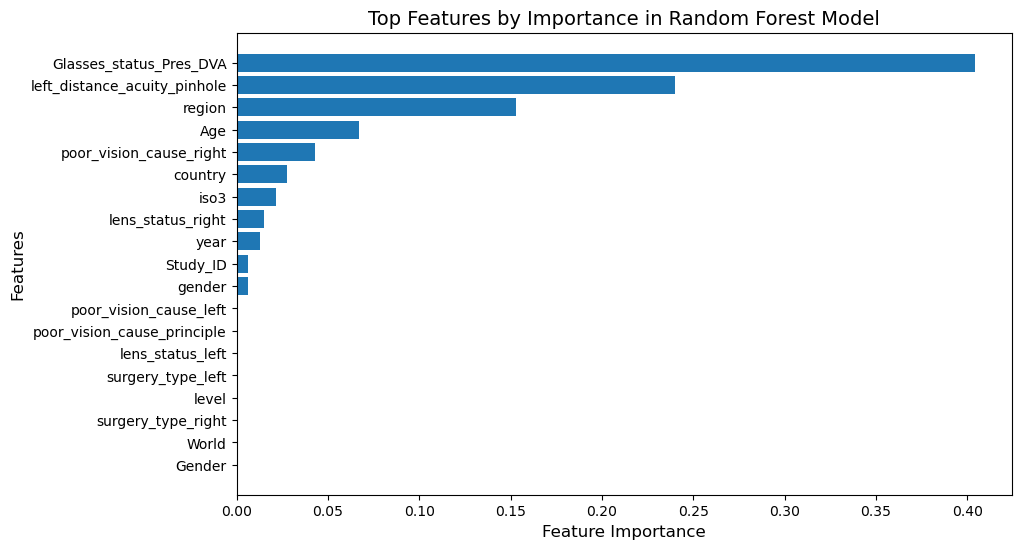

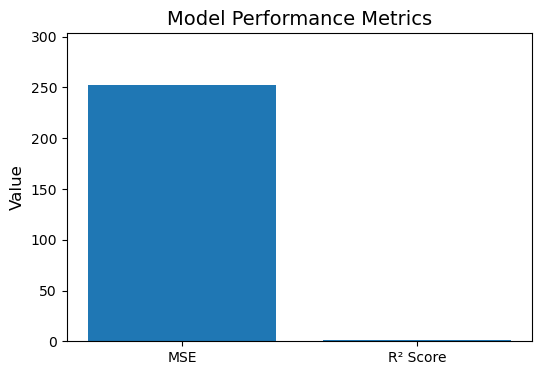

In [26]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(important_features["Feature"], important_features["Importance"], align="center")
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top Features by Importance in Random Forest Model", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Plot performance metrics
plt.figure(figsize=(6, 4))
metrics = ["MSE", "R² Score"]
values = [252.77, 0.8502]
plt.bar(metrics, values)
plt.title("Model Performance Metrics", fontsize=14)
plt.ylabel("Value", fontsize=12)
plt.ylim(0, 1 if max(values) <= 1 else max(values) * 1.2)
plt.show()


                   Model         MSE  R² Score
0  Random Forest (Tuned)  252.773706  0.850192
1       Ridge Regression  881.329744  0.477673
2          Decision Tree  267.133090  0.841681


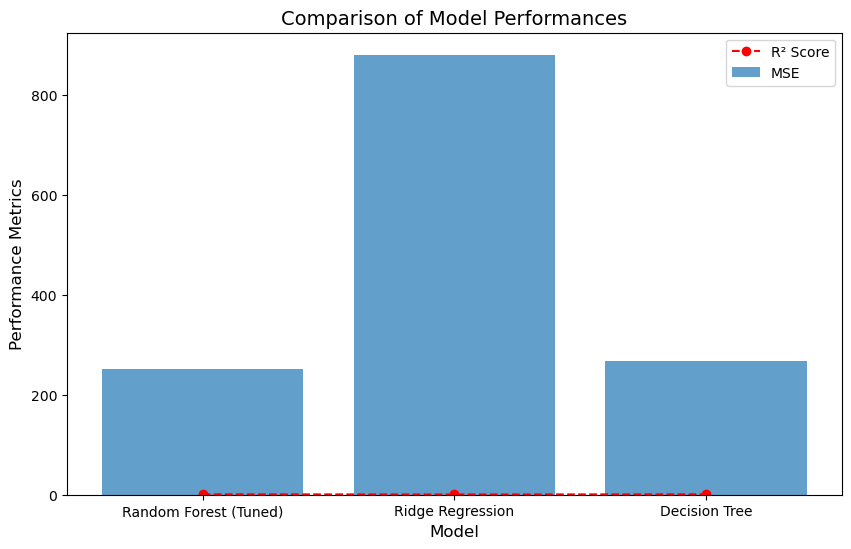

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

# Train Random Forest model (already tuned previously)
y_pred_rf = model_tuned.predict(X_test)

# Train Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Train Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluate all models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Compare performances
model_comparison = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "Ridge Regression", "Decision Tree"],
    "MSE": [mse_rf, mse_ridge, mse_dt],
    "R² Score": [r2_rf, r2_ridge, r2_dt]
})

# Display the comparison table
print(model_comparison)

# Plot comparison
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
x = model_comparison["Model"]
y1 = model_comparison["MSE"]
y2 = model_comparison["R² Score"]

plt.bar(x, y1, alpha=0.7, label='MSE')
plt.plot(x, y2, marker='o', color='red', label='R² Score', linestyle='--')

plt.title("Comparison of Model Performances", fontsize=14)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Performance Metrics", fontsize=12)
plt.legend()
plt.show()


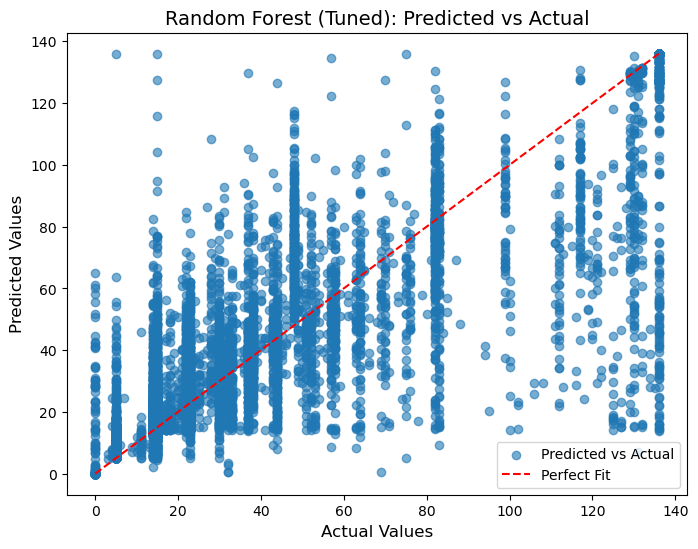

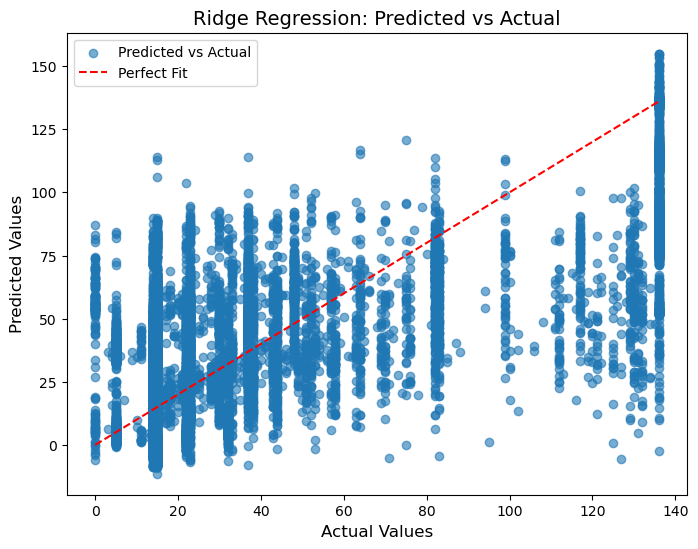

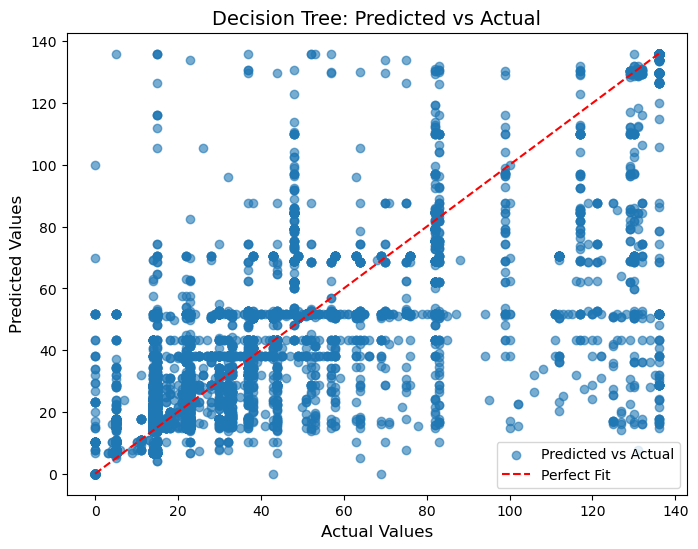

In [34]:
# Reinitialize Ridge and Decision Tree models and redefine predictions

from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

# Ridge Regression model
ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42, max_depth=10)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Predictions from previously tuned Random Forest
y_pred_rf = model_tuned.predict(X_test)

# Simplified individual plots for predicted vs actual values for each model

# Random Forest (Tuned)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.title("Random Forest (Tuned): Predicted vs Actual", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.show()

# Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.title("Ridge Regression: Predicted vs Actual", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.show()

# Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Fit')
plt.title("Decision Tree: Predicted vs Actual", fontsize=14)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.show()


In [ ]:
# The predicted vs. actual values for the three models (Random Forest, Ridge Regression, and Decision Tree) have been successfully plotted:

# Random Forest (Tuned): A strong alignment with the perfect fit line indicates good performance.
# Ridge Regression: The scatterplot shows a moderate fit compared to Random Forest.
# Decision Tree: Displays performance that may depend on the depth and structure of the tree.